In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv(r"C:\Users\bajaj\Desktop\EV market Segmentation\datasets\1_ev_charger_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.2+ KB


In [4]:
df.describe()

,2W,3W,4W,Bus,Chargers
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000,106.791667
std,10942.261145,8850.690961,476.930628,63.771331,96.623869
min,187.000000,234.000000,12.000000,0.000000,10.000000
25%,848.000000,512.750000,34.750000,0.000000,25.000000
50%,2967.500000,931.000000,129.000000,0.000000,67.500000
75%,10697.750000,2659.250000,434.000000,5.500000,180.250000
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000


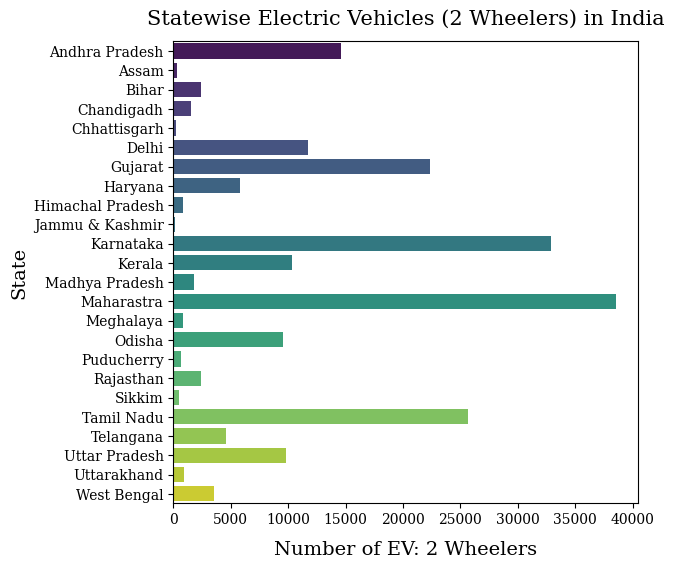

In [5]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['Region'].sort_values(ascending=True), x='2W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

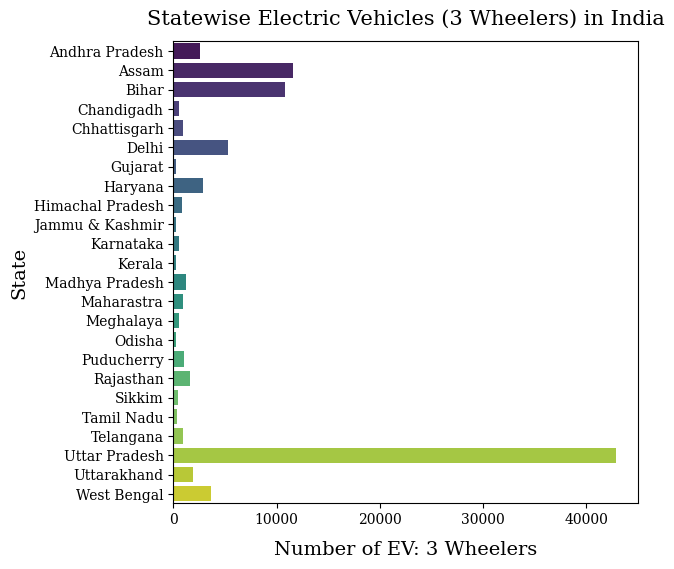

In [6]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['Region'].sort_values(ascending=True), x='3W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 3 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (3 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

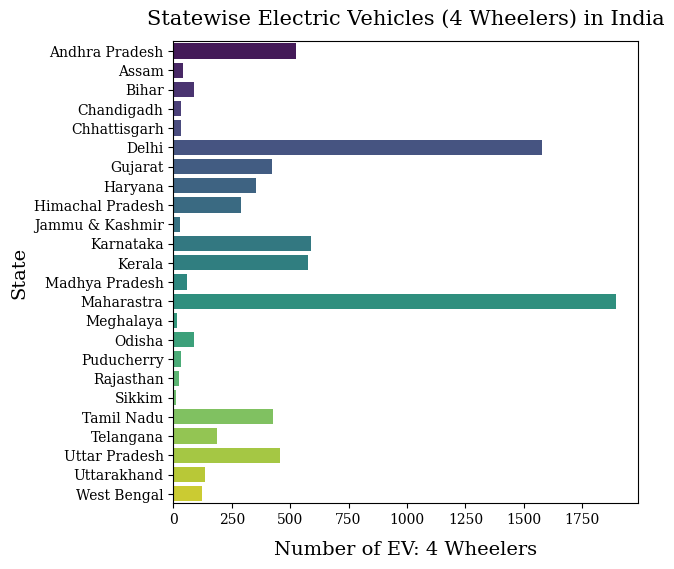

In [7]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['Region'].sort_values(ascending=True), x='4W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 4 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (4 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

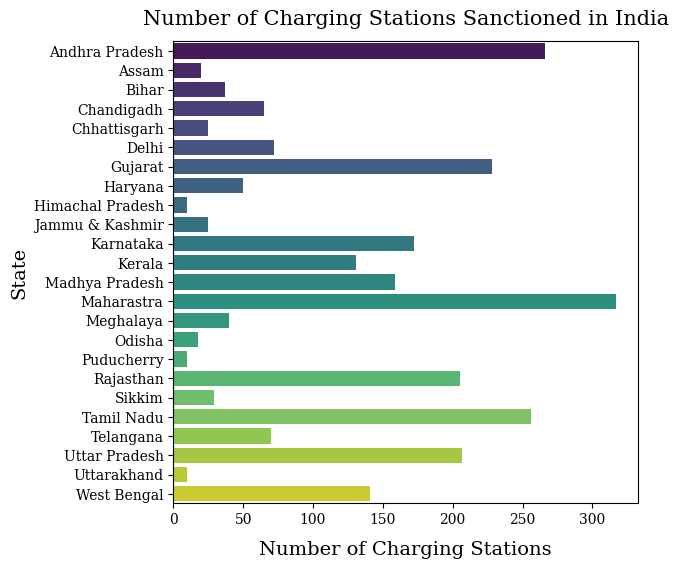

In [8]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['Region'].sort_values(ascending=True), x='Chargers', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of Charging Stations', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Number of Charging Stations Sanctioned in India', weight=200, family='serif', size=15, pad=12)
plt.show()

In [9]:
df2=pd.read_csv(r"C:\Users\bajaj\Desktop\EV market Segmentation\datasets\2_ev_charging_station_dataset.csv")

In [10]:
df2.tail()

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
28,29,UT of DNH and DD,183,307671,307854
29,30,Uttarakhand,31008,3312041,3343049
30,31,Uttar Pradesh,337180,40092490,40429670
31,32,West Bengal,48767,14134171,14182938
32,Grand Total,Grand Total,1334385,278169631,279504016


In [11]:
df2=df2.drop(32)

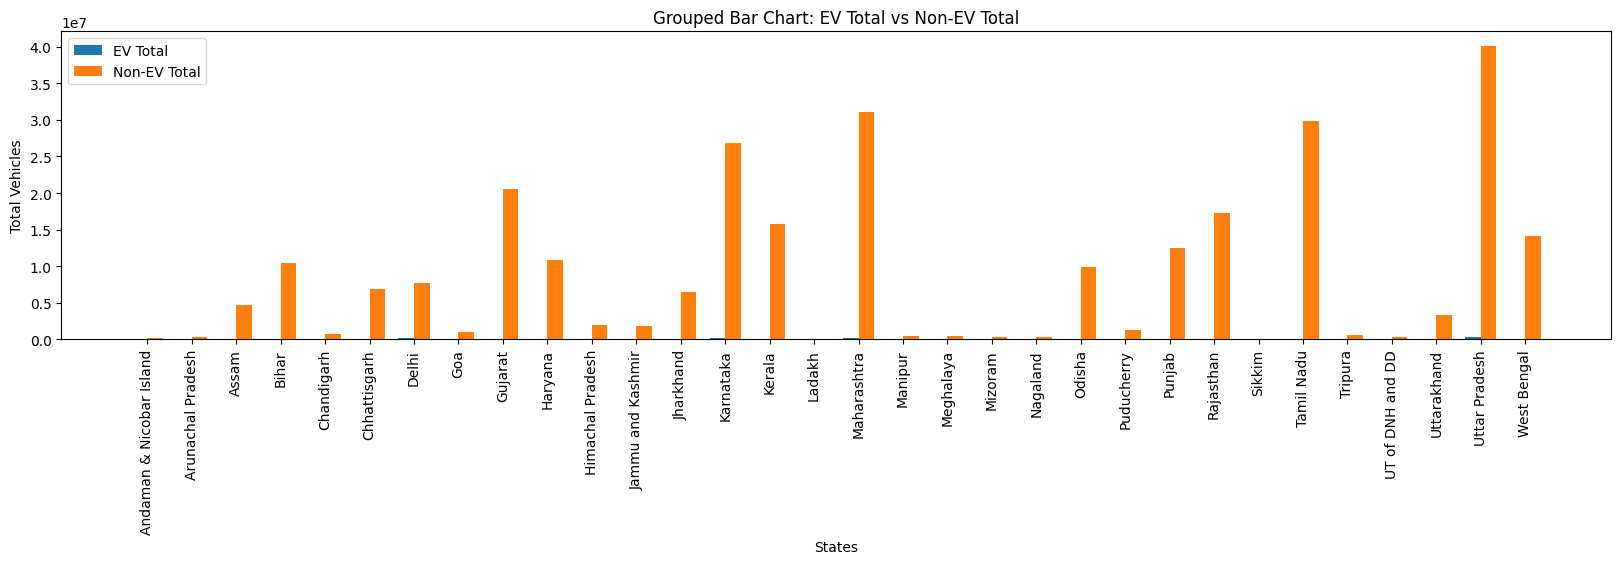

In [12]:
import numpy as np
bar_width = 0.35
x = np.arange(len(df2['State Name']))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 4))

# Plot the bars for EV Total
rects1 = ax.bar(x - bar_width/2,df2['Total Electric Vehicle'], bar_width, label='EV Total')

# Plot the bars for Non-EV Total
rects2 = ax.bar(x + bar_width/2,df2['Total Non-Electric Vehicle'], bar_width, label='Non-EV Total')

# Add labels and title to the graph
ax.set_xlabel('States')
ax.set_ylabel('Total Vehicles')
ax.set_title('Grouped Bar Chart: EV Total vs Non-EV Total')
ax.set_xticks(x)
ax.set_xticklabels(df2['State Name'], rotation=90)
ax.legend()

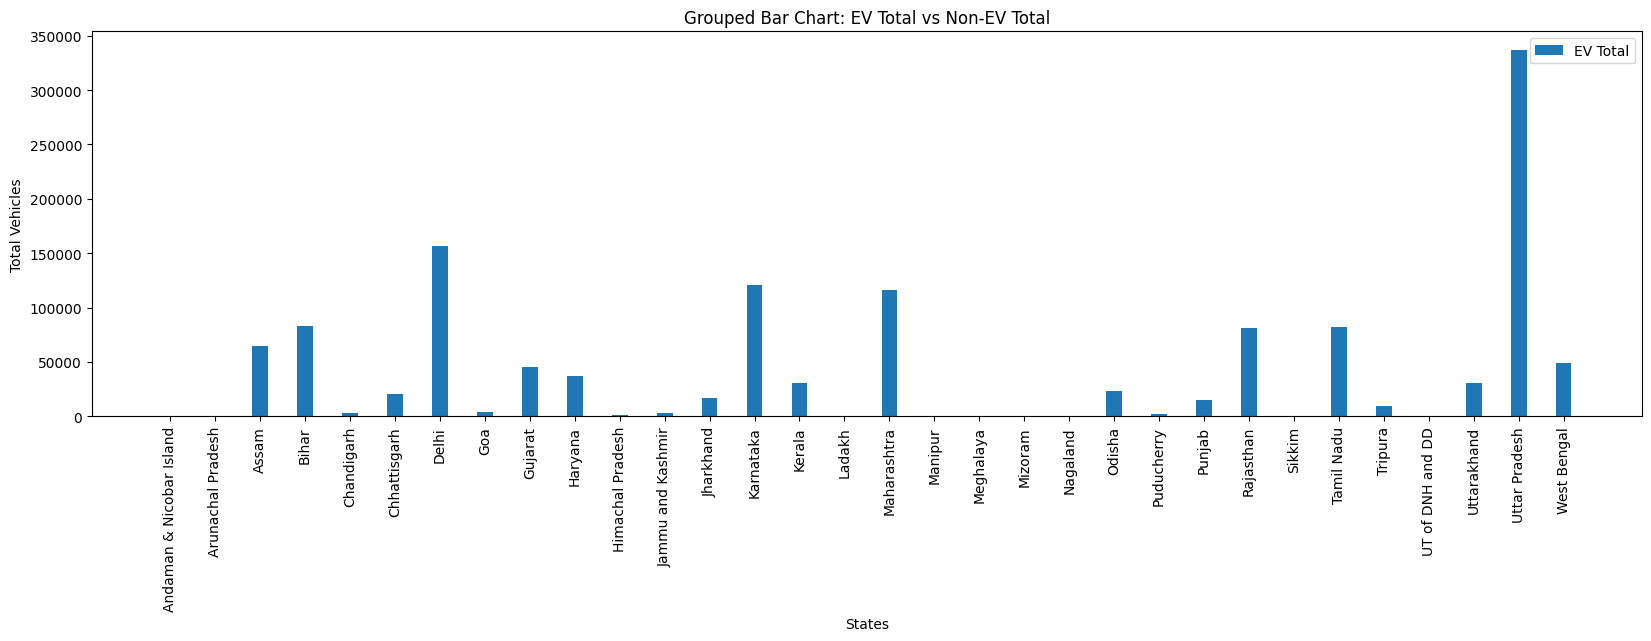

In [13]:
bar_width = 0.35
x = np.arange(len(df2['State Name']))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 5))

# Plot the bars for EV Total
rects1 = ax.bar(x,df2['Total Electric Vehicle'], bar_width, label='EV Total')


# Add labels and title to the graph
ax.set_xlabel('States')
ax.set_ylabel('Total Vehicles')
ax.set_title('Grouped Bar Chart: EV Total vs Non-EV Total')
ax.set_xticks(x)
ax.set_xticklabels(df2['State Name'], rotation=90)
ax.legend()

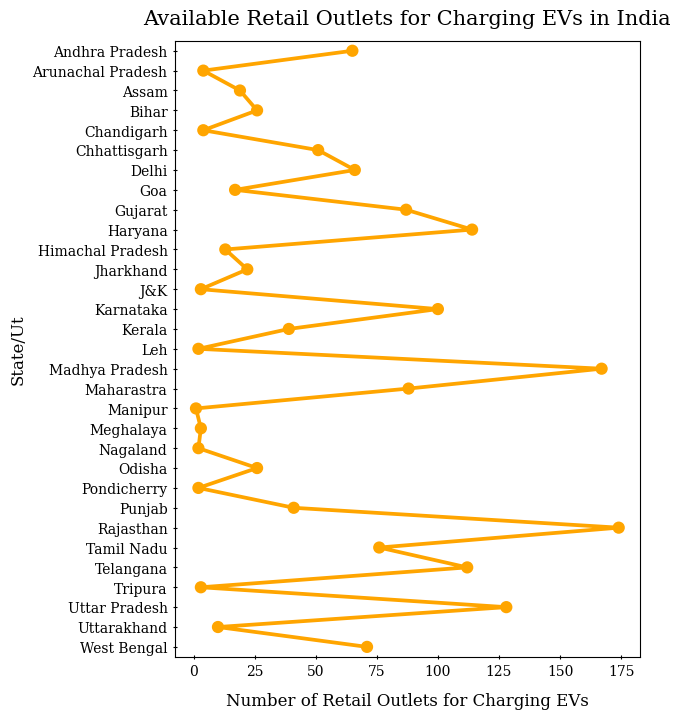

In [14]:
df3=pd.read_excel(r"C:\Users\bajaj\Desktop\EV market Segmentation\datasets\2_ev_charging_station_dataset.xlsx", sheet_name='Table 4', header=1)
plt.figure(figsize=(6, 8))
sns.pointplot(data=df3, y='State/UT', x='EV Charging Facility', color='orange')
plt.xlabel('Number of Retail Outlets for Charging EVs', family='serif', size=12, labelpad=10)
plt.ylabel('State/Ut', family='serif', size=12)
plt.tick_params(direction='inout')
plt.xticks(family='serif', size=10)
plt.yticks(family='serif', size=10)
plt.title(label='Available Retail Outlets for Charging EVs in India', weight=200, family='serif', size=15, pad=12)
plt.show()

In [15]:
df4=pd.read_csv(r"C:\Users\bajaj\Desktop\EV market Segmentation\datasets\CS_Highway (1).csv")
df4=df4.drop(9)

Text(0.5, 1.0, 'Available Charging stations on EVs in India')

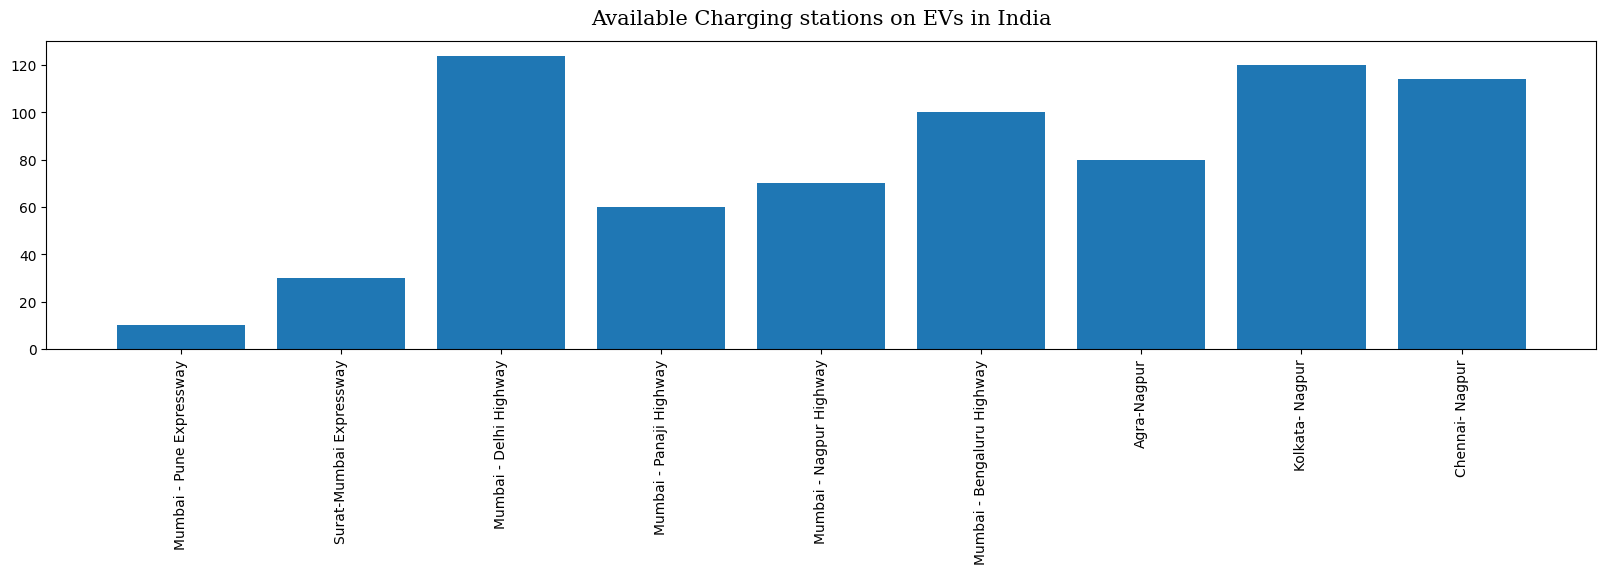

In [16]:
plt.figure(figsize=(20, 4))
plt.bar(df4['Highways/Expressways'],df4['Charging Stations'])
plt.xticks(rotation=90)
plt.title(label='Available Charging stations on EVs in India', weight=200, family='serif', size=15, pad=12)



In [17]:
df5=pd.read_csv(r"C:\Users\bajaj\Desktop\EV market Segmentation\datasets\states_data_car.csv")
df5 = df5.reset_index(drop=True)


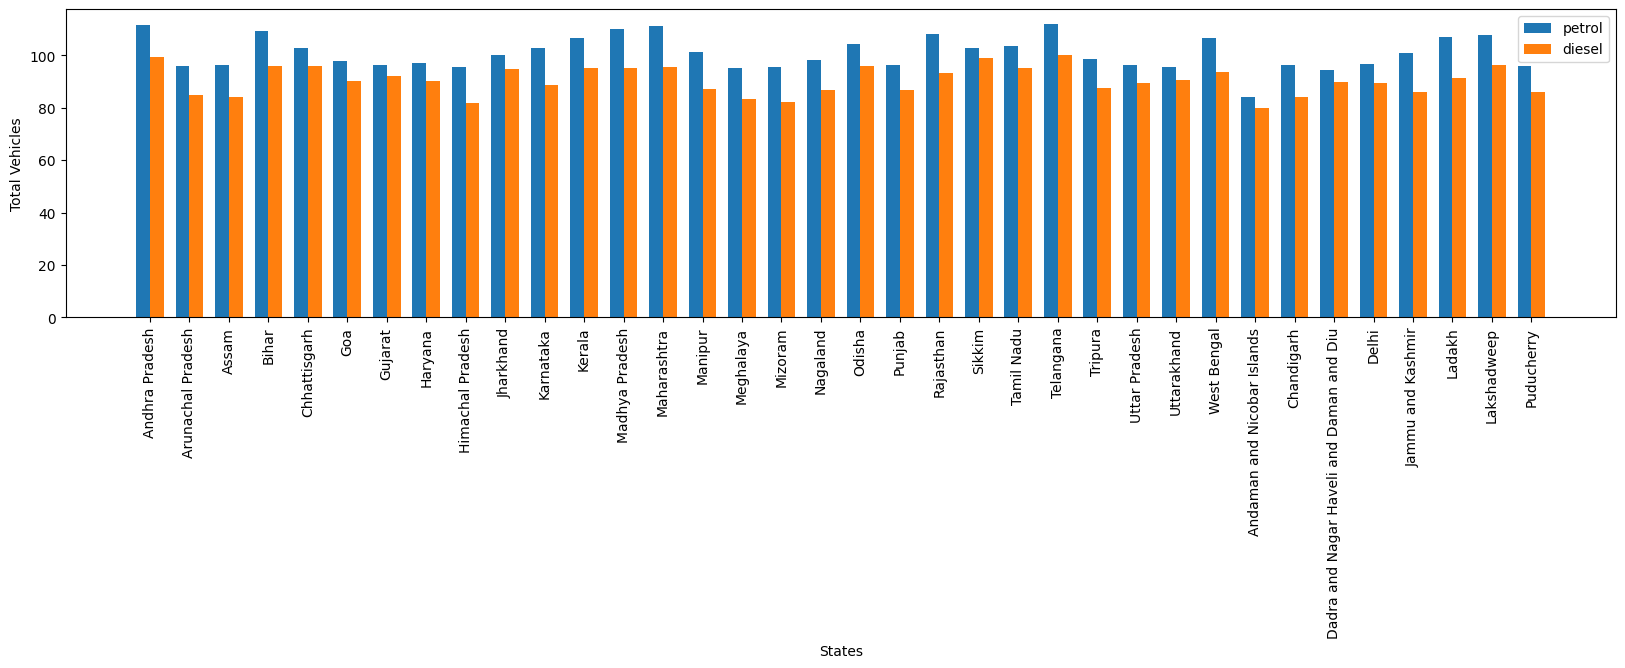

In [18]:
import numpy as np
bar_width = 0.35
x = np.arange(len(df5['state']))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 4))

# Plot the bars for EV Total
rects1 = ax.bar(x - bar_width/2,df5['petrol'], bar_width,label='petrol')

# Plot the bars for Non-EV Total
rects2 = ax.bar(x + bar_width/2,df5['diesel'], bar_width,label='diesel' )

# Add labels and title to the graph
ax.set_xlabel('States')
ax.set_ylabel('Total Vehicles')
ax.set_xticks(x)
ax.set_xticklabels(df5['state'], rotation=90)
ax.legend()

In [19]:
df6=pd.read_excel(r"C:\Users\bajaj\Desktop\EV market Segmentation\datasets\2_ev_charging_station_dataset.xlsx", sheet_name='Table 2', header=1)
df6=df6.drop(25)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Maharashtra'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Tamil Nadu'),
  Text(3, 0, 'Gujarat'),
  Text(4, 0, 'Uttar Pradesh'),
  Text(5, 0, 'Rajasthan'),
  Text(6, 0, 'Karnataka'),
  Text(7, 0, 'Madhya Pradesh'),
  Text(8, 0, 'West Bengal'),
  Text(9, 0, 'Telangana'),
  Text(10, 0, 'Kerala'),
  Text(11, 0, 'Delhi'),
  Text(12, 0, 'Chandigarh'),
  Text(13, 0, 'Haryana'),
  Text(14, 0, 'Meghalaya'),
  Text(15, 0, 'Bihar'),
  Text(16, 0, 'Sikkim'),
  Text(17, 0, 'Jammu & Kashmir'),
  Text(18, 0, 'Chhattisgarh'),
  Text(19, 0, 'Assam'),
  Text(20, 0, 'Odisha'),
  Text(21, 0, 'Uttarakhand'),
  Text(22, 0, 'Puducherry'),
  Text(23, 0, 'Andaman and Nicobar (Port Blair)'),
  Text(24, 0, 'Himachal Pradesh')])

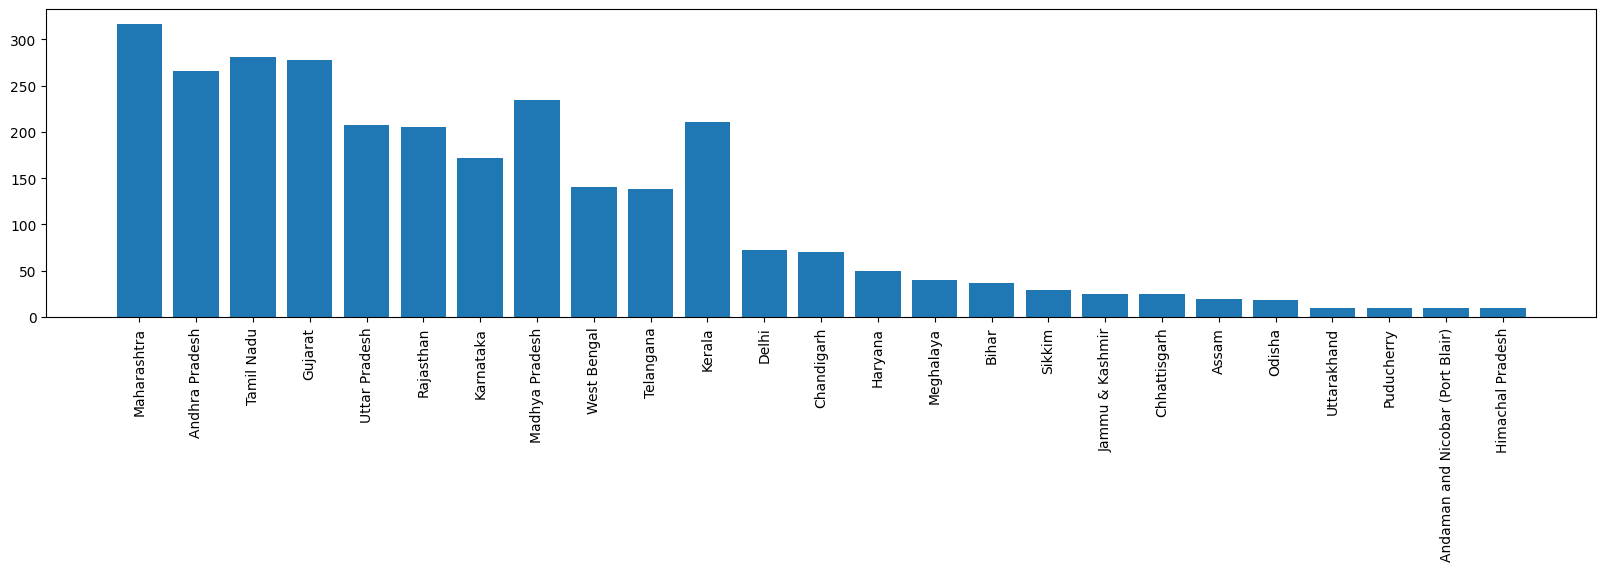

In [20]:
plt.figure(figsize=(20, 4))
plt.bar(df6['State'],df6['No. of EV chargers sanctioned'])
plt.xticks(rotation=90)


In [21]:
df7=pd.read_excel(r"C:\Users\bajaj\Desktop\EV market Segmentation\datasets\type_maharashtra.xlsx")
df7 = df7.dropna(subset=['ELECTRIC(BOV)'])
df7 = df7.sort_values(by='ELECTRIC(BOV)')
df7

,vehicles,CNG ONLY,DIESEL,ELECTRIC(BOV),ETHANOL,FUEL CELL HYDROGEN,SOLAR
19,THREE WHEELER (PERSONAL),0,147,0,0,0,0
1,AGRICULTURAL TRACTOR,35,"10,347",1,0,0,0
20,TRAILER (COMMERCIAL),0,169,1,0,0,0
7,LIBRARY VAN,1,36,1,0,0,0
21,VEHICLE FITTED WITH COMPRESSOR,4,"2,380",1,0,0,0
9,MAXI CAB,0,"5,537","1,06,327",0,0,880
2,BULLDOZER,"7,515","1,09,628","1,116",1,0,1
13,MOTOR CAB,"1,094","19,71,766","12,609",0,0,37
8,LUXURY CAB,10,"3,183",2,0,0,0
4,E-RICKSHAW(P),0,0,"2,132",0,0,0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'THREE WHEELER (PERSONAL)'),
  Text(1, 0, 'AGRICULTURAL TRACTOR'),
  Text(2, 0, 'TRAILER (COMMERCIAL)'),
  Text(3, 0, 'LIBRARY VAN'),
  Text(4, 0, 'VEHICLE FITTED WITH COMPRESSOR'),
  Text(5, 0, 'MAXI CAB'),
  Text(6, 0, 'BULLDOZER'),
  Text(7, 0, 'MOTOR CAB'),
  Text(8, 0, 'LUXURY CAB'),
  Text(9, 0, 'E-RICKSHAW(P)'),
  Text(10, 0, 'THREE WHEELER (GOODS)'),
  Text(11, 0, 'FIRE TENDERS'),
  Text(12, 0, 'THREE WHEELER (PASSENGER)'),
  Text(13, 0, 'VEHICLE FITTED WITH GENERATOR'),
  Text(14, 0, 'MODULAR HYDRAULIC TRAILER'),
  Text(15, 0, 'FORK LIFT'),
  Text(16, 0, 'MOTOR CYCLE/SCOOTER-SIDECAR(T)'),
  Text(17, 0, 'EDUCATIONAL INSTITUTION BUS'),
  Text(18, 0, 'MOTOR CYCLE/SCOOTER-WITH TRAILER'),
  Text(19, 0, 'MOPED'),
  Text(20, 0, 'ADAPTED VEHICLE'),
  Text(21, 0, 'M-CYCLE/SCOOTER'),
  Text(22, 0, 'SNORKED LADDERS')])

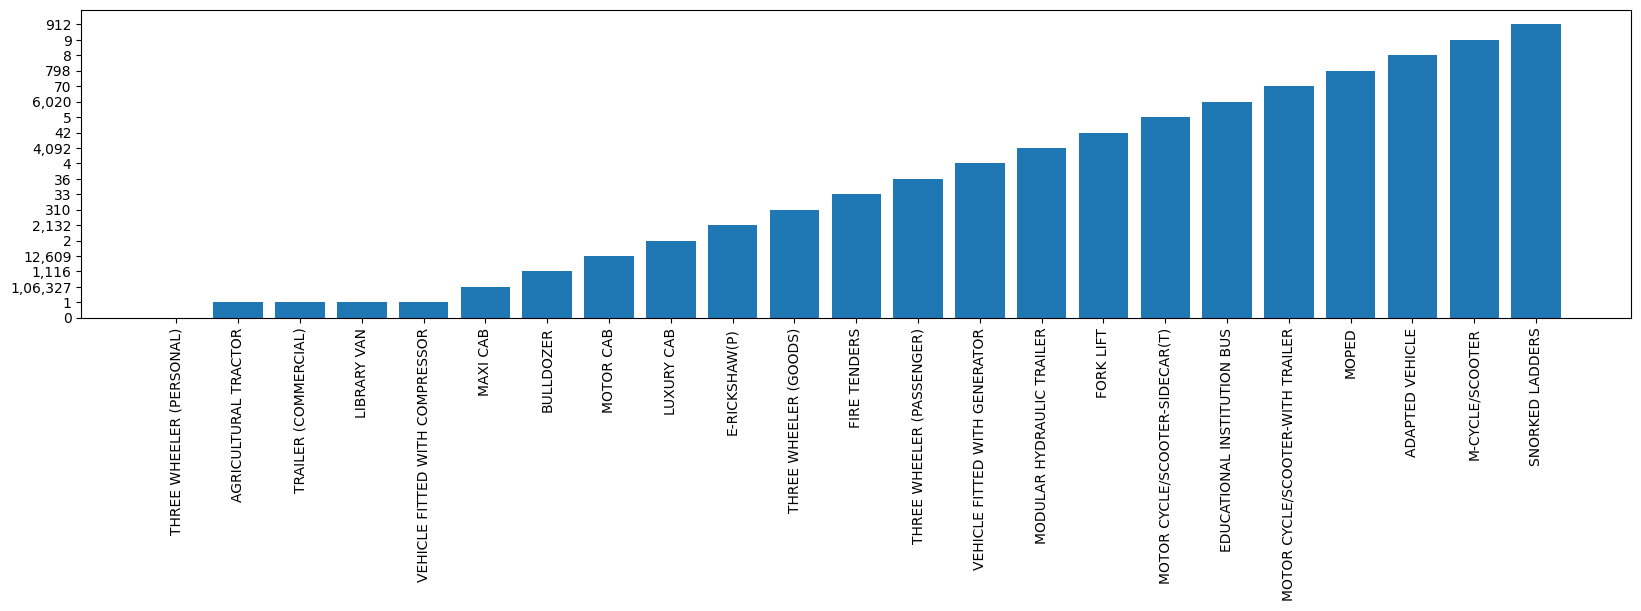

In [22]:
plt.figure(figsize=(20, 4))
plt.bar(df7['vehicles'],df7['ELECTRIC(BOV)'])
plt.xticks(rotation=90)

In [23]:
# This data contains the details about consumers who purchased an EV
df8=pd.read_csv(r"C:\Users\bajaj\Desktop\EV market Segmentation\datasets\behavioural_dataset (1).csv")

In [24]:
df8.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
df8.rename(columns={'Price':'EV_Price'},inplace=True)
df8.head(10)

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000
5,28,Salaried,Married,Graduate,3,Yes,900000,700000
6,31,Salaried,Married,Graduate,4,No,1800000,1200000
7,33,Business,Married,Post Graduate,4,No,1400000,700000
8,34,Business,Married,Post Graduate,4,No,2000000,1100000
9,34,Salaried,Married,Graduate,3,Yes,1900000,800000


In [25]:
df8.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Age  Profession  Marrital Status  Education  No of Dependents  Car_Loan  \
0   False       False            False      False             False     False   
1   False       False            False      False             False     False   
2   False       False            False      False             False     False   
3   False       False            False      False             False     False   
4   False       False            False      False             False     False   
..    ...         ...              ...        ...               ...       ...   
94  False       False            False      False             False     False   
95  False       False            False      False             False     False   
96  False       False            False      False             False     False   
97  False       False            False      False             False     False   
98  False       False            False      Fal

In [26]:
df8['Total Salary'].mean()

2270707.0707070706

In [27]:
df8.EV_Price.mean()

1194040.4040404041

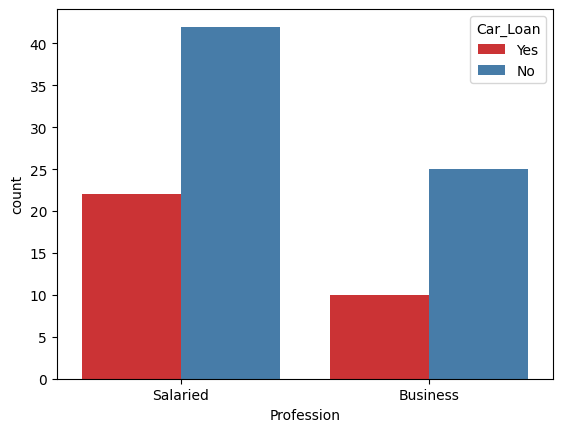

In [28]:
sns.countplot(x ='Profession', hue = 'Car_Loan',  data = df8, palette = 'Set1')
plt.show()

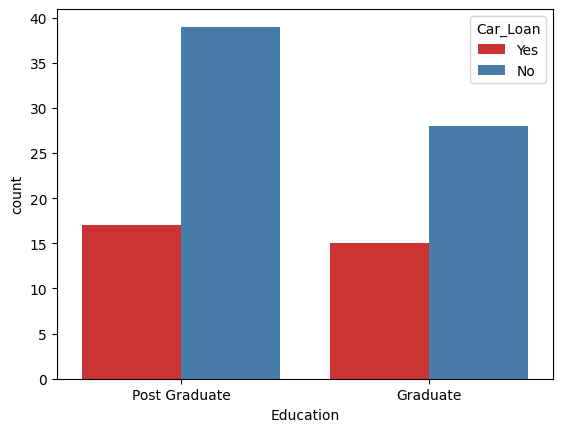

In [29]:
sns.countplot(x ='Education', hue = 'Car_Loan',  data = df8, palette = 'Set1')
plt.show()

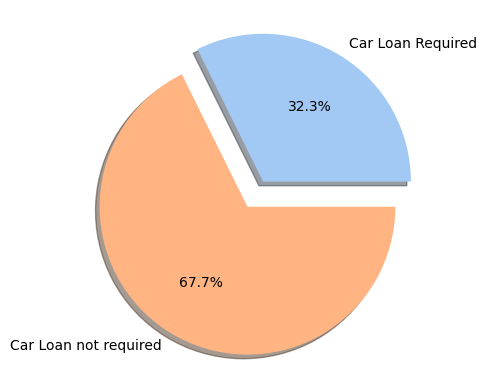

In [30]:
#Getting labels and data
labels = ['Car Loan Required','Car Loan not required']
Loan_status = [df8.query('Car_Loan == "Yes"').Car_Loan.count(),df8.query('Car_Loan == "No"').Car_Loan.count()]

# declaring exploding pie
explode = [0.1, 0.1]
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.1f%%')
  
# displaying chart
plt.show()

In [31]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

You should consider upgrading via the 'C:\Users\bajaj\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [32]:
cluster_features = list(df8.columns)
cluster_data = df8[cluster_features].values

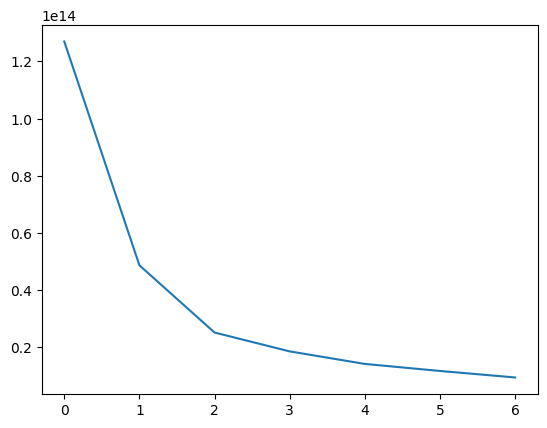

In [33]:
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(cluster_data, categorical=[1,2,3,5])
    cost.append(kproto.cost_)

plt.plot(cost)

In [34]:
cost

[126979657487180.34,
 48616816198579.65,
 25087753148183.234,
 18491809410726.285,
 14099253855131.873,
 11636836256958.104,
 9357582584100.191]

In [35]:
kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=20)
clusters = kproto.fit_predict(cluster_data, categorical=[1,2,3,5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 7, ncost: 48616816198579.65
Run: 1, iteration: 2/20, moves: 0, ncost: 48616816198579.65
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 38, ncost: 60593966305440.77
Run: 2, iteration: 2/20, moves: 20, ncost: 50447073534650.24
Run: 2, iteration: 3/20, moves: 3, ncost: 50057040964014.66
Run: 2, iteration: 4/20, moves: 1, ncost: 50020391397205.32
Run: 2, iteration: 5/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 11, ncost: 50528143911238.56
Run: 3, iteration: 2/20, moves: 5, ncost: 48837287201079.53
Run: 3, iteration: 3/20, moves: 1, ncost: 48777842651066.98
Run: 3, iteration: 4/20, moves: 0, ncost: 48777842651066.98
Init: initializing ce

In [36]:
df8['Cluster'] = clusters

In [37]:
df8.EV_Price[df8.Cluster==0].mean()

1029305.5555555555

In [38]:
df8['Education'][df8.Cluster==0]

0     Post Graduate
1     Post Graduate
2          Graduate
3     Post Graduate
4     Post Graduate
          ...      
90         Graduate
93    Post Graduate
94         Graduate
96         Graduate
98    Post Graduate
Name: Education, Length: 72, dtype: object

In [39]:
df8['Marrital Status'][df8.Cluster==0]

0      Single
1     Married
2     Married
3     Married
4     Married
       ...   
90    Married
93     Single
94     Single
96    Married
98    Married
Name: Marrital Status, Length: 72, dtype: object

In [40]:
df8['Total Salary'][df8.Cluster==0].mean()

1751388.888888889

In [41]:
df8.EV_Price[df8.Cluster==1].mean()

1633333.3333333333

In [42]:
df8['Marrital Status'][df8.Cluster==1]

15    Married
25    Married
29    Married
32    Married
35    Married
45    Married
49    Married
51    Married
52    Married
53    Married
54    Married
55    Married
66    Married
68    Married
70    Married
71    Married
75    Married
77    Married
78    Married
79    Married
81    Married
83    Married
88    Married
91    Married
92    Married
95    Married
97    Married
Name: Marrital Status, dtype: object

In [43]:
df8['Total Salary'][df8.Cluster==1].mean()

3655555.5555555555

In [44]:
df8['Cluster'].value_counts()

0    72
1    27
Name: Cluster, dtype: int64

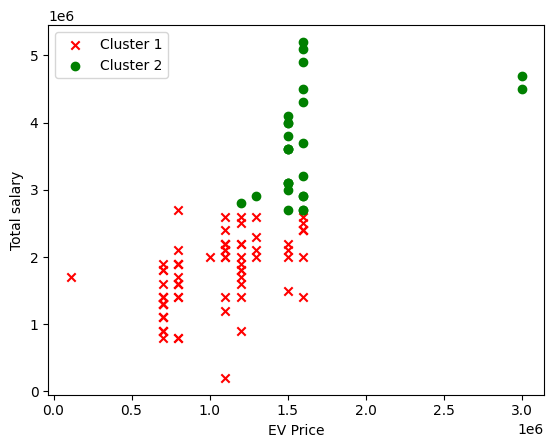

In [45]:
Cluster_0 = df8[df8.Cluster==0]
Cluster_1 = df8[df8.Cluster==1]
plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total salary')
plt.show()

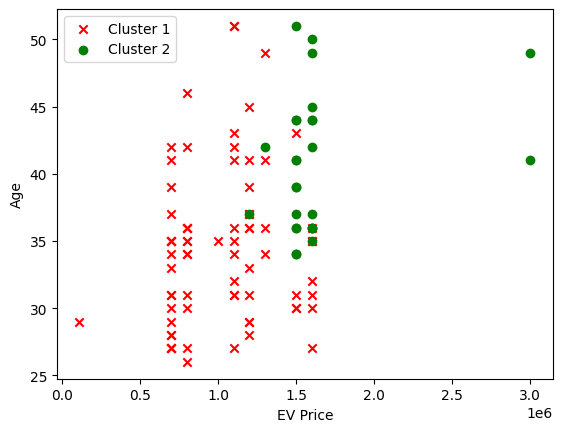

In [46]:
Cluster_0 = df8[df8.Cluster==0]
Cluster_1 = df8[df8.Cluster==1]
plt.scatter(Cluster_0.EV_Price, Cluster_0['Age'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Age'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Age')
plt.show()

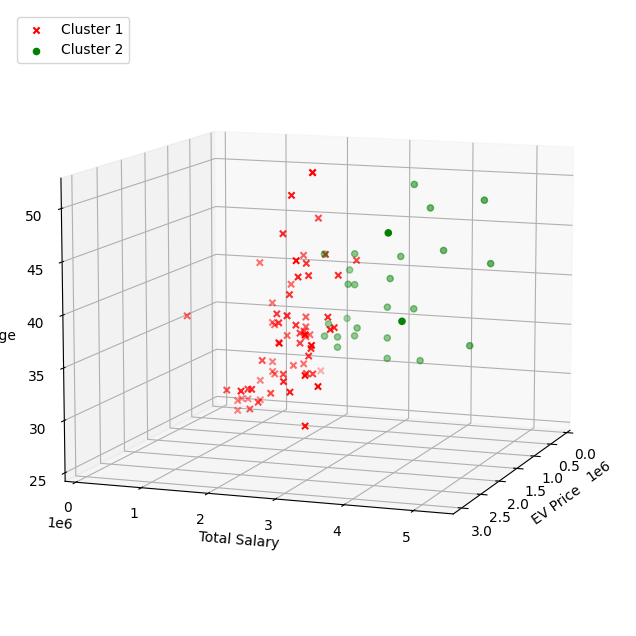

In [47]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['Age'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['Age'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()
